# Questions

1. Exprimez la densité électronique $n_e$ d’un milieu en fonction de sa composition atomique et de
sa masse volumique $\rho$, et calculer ne pour l’eau (liquide) et l’os compact (définition de l'ICRU).
On s’appuiera sur les données du [NIST](https://physics.nist.gov/cgi-bin/Star/compos.pl?ap) pour les compositions atomiques de ces matériaux.

$$n_e = \frac{\rho}{m_u} \sum_i \left( \frac{Z_i}{A_i} \right) w_i$$

où:
- $\rho$ est la masse volumique du matériau (en kg/$\text{m}^3$)
- blabla

In [1]:
def n_e(rho, Zs, As, ws):
    return rho / 1.660539066e-27 * sum([Z/A*w for Z, A, w in zip(Zs, As, ws)])

# Eau liquide
n_e_liquid_water = n_e(1.0*1e3, [1, 8], [1.0080, 15.999], [0.111894, 0.888106])
print(f"Eau liquide : {n_e_liquid_water} m^-3")

# Os
n_e_compact_bone = n_e(
    1.85*1e3, [1, 6, 7, 8, 12, 15, 16, 20],
    [1.008, 12.011, 14.007, 15.999, 24.305, 30.973762, 32.07, 40.08],
    [0.063984, 0.278000, 0.027000, 0.410016, 0.002000, 0.070000, 0.002000, 0.147000])
print(f"Os compact : {n_e_compact_bone} m^-3")

Eau liquide : 3.34281028850027e+29 m^-3
Os compact : 5.905836255954328e+29 m^-3


2. Tracez les courbes du pouvoir d’arrêt collisionnel massique pour ces milieux en fonction de
l’énergie cinétique (T). Pour expliciter la dépendance en $T$ de $S_{\text{col}}$, utilisez les relations 9 et
10 ci-bas. Pour le graphique, utilisez une échelle logarithmique en abscisse. Vous trouverez les
énergies moyennes d’excitation $I$ de ces matériaux sur le site du NIST également.

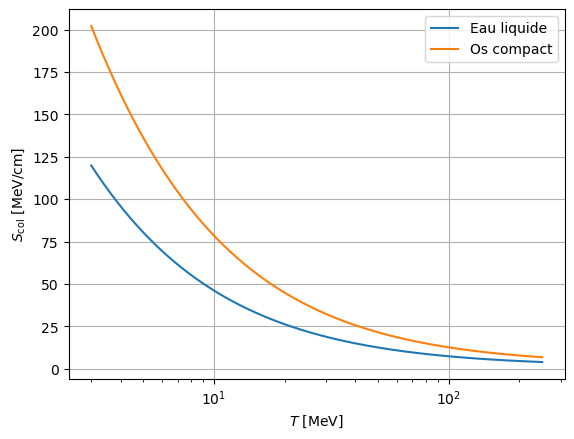

In [2]:
import matplotlib.pyplot as plt
import numpy as np

r_e = 2.8179403227e-15 # m
m_e = 9.1093837139e-31 # kg
m_p = 1.67262192595e-27 # kg
c = 3e8 # m/s
J_par_eV = 1.602176634e-19 # J/eV


def gamma(T):
    return T / (m_p*c**2) + 1

def beta_squared(T):
    return (gamma(T)**2 - 1) / gamma(T)**2

def T_e_max(T): # J
    return 2 * m_e * c**2 * (gamma(T)**2 - 1) / (1 + 2 * gamma(T) * m_e/m_p + (m_e/m_p)**2)

def S_col(T, n_e, I): # [J/m]
    term1 = 2*np.pi * r_e**2* m_e * c**2 * n_e / beta_squared(T)
    term2 = np.log(2 * m_e * c**2 * beta_squared(T) * gamma(T)**2 * T_e_max(T) / I**2)
    term3 = 2*beta_squared(T)

    return term1 * (term2 - term3)

I_water = 75*J_par_eV # J
I_bone = 91.9*J_par_eV # J

def S_col_water(T_MeV):
    T = T_MeV * 1e6 * J_par_eV
    S = S_col(T, n_e_liquid_water, I_water) # [J/m]

    return S / J_par_eV / 1e6 / 1e2 # [MeV/cm]

def S_col_bone(T_MeV):
    T = T_MeV * 1e6 * J_par_eV # J
    S = S_col(T, n_e_compact_bone, I_bone) # [J/m]

    return S / J_par_eV / 1e6 / 1e2 # [MeV/cm]

kinetic_energy_mev = np.linspace(3, 250, 10000) # MeV

plt.figure()
plt.plot(kinetic_energy_mev, S_col_water(kinetic_energy_mev), label="Eau liquide")
plt.plot(kinetic_energy_mev, S_col_bone(kinetic_energy_mev), label="Os compact")
plt.xscale("log")
plt.xlabel("$T$ [MeV]")
plt.ylabel("$S_{\\text{col}}$ [MeV/cm]")
plt.legend()
plt.grid()


# Portée des protons dans la matière

3. En quoi la seule considération des interactions des protons avec les électrons du milieu est-elle justifiée ? Appuyez votre réponse en comparant les contributions des interactions nucléaires (protons avec noyaux atomiques du milieu) et radiatives (pertes d’énergie par _Bremsstrahlung_) au pouvoir d’arrêt total sur la plage 3-250 MeV. Les données PSTAR et un graphique pourraient être utiles

Text(0.5, 1.0, 'Os compact')

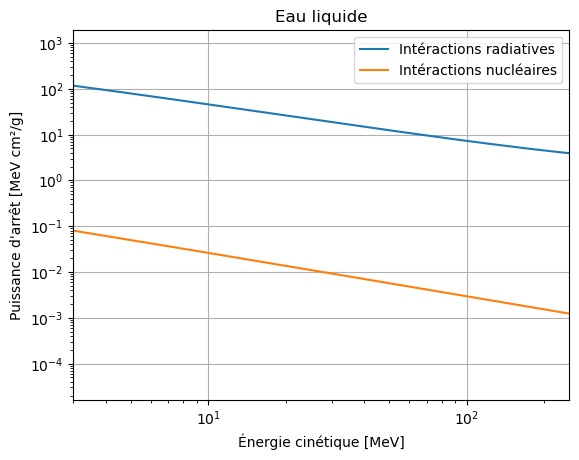

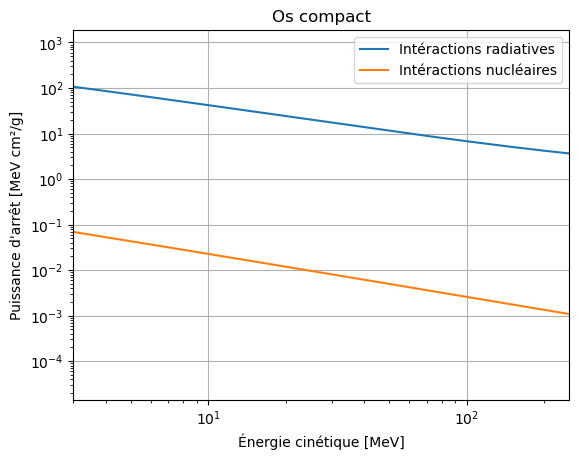

In [3]:
# Colonnes : Énergie cinétique [MeV], Puissance d'arrêt électron [MeV cm^2/g], Puissance d'arrêt nucléaire [MeV cm^2/g], 
water_liquid_data = np.loadtxt("data/water_liquid_apdata.pl", skiprows=8)
bone_data = np.loadtxt("data/bone_apdata.pl", skiprows=8)

plt.figure()
plt.plot(water_liquid_data[:, 0], water_liquid_data[:, 1], label="Intéractions radiatives")
plt.plot(water_liquid_data[:, 0], water_liquid_data[:, 2], label="Intéractions nucléaires")

plt.xlim(3, 250)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Énergie cinétique [MeV]")
plt.ylabel("Puissance d'arrêt [MeV cm²/g]")
plt.grid()
plt.title("Eau liquide")

plt.figure()
plt.plot(bone_data[:, 0], bone_data[:, 1], label="Intéractions radiatives")
plt.plot(bone_data[:, 0], bone_data[:, 2], label="Intéractions nucléaires")

plt.xlim(3, 250)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Énergie cinétique [MeV]")
plt.ylabel("Puissance d'arrêt [MeV cm²/g]")
plt.grid()
plt.title("Os compact")

Les graphiques ci-dessus montrent que la contribution des intéractions nucléaires est inférieure par 3 ordres de grandeur par rapport à celle des électrons. Donc, il est raisonnable de négliger la contribution des intéractions nucléaires.

4. Pourquoi intègre-t-on l’inverse du pouvoir d’arrêt pour déterminer la portée ?

Les unités de $S_{\text{col}}$ sont [MeV/cm]. Ainsi, en intégrant l'inverse de $S_\text{col}$ par rapport à l'énergie, on obtient des cm et donc une longueur.

5. Justifiez la nécessité d’employer une méthode numérique pour calculer la portée des protons.

On observe que l'intégrande est une fonction de T, car $\beta$ et $\gamma$ dépendent de T
et qu'elle contient des logarithmes et des termes au carré. Il est évident que c'est une intégrale tout sauf triviale à calculer, y compris pour nos outils d'intégration symbolique comme WolframAlpha. Il est vastement plus simple de calculer l'intégrale numériquement.

6. Implémenter deux algorithmes d’intégration numérique pour calculer la portée des protons dans l’eau et dans l’os compact ; le premier avec la méthode des trapèzes et le second avec la méthode de Romberg. Considérez des protons d’énergie initiale de 150 MeV à l’entrée du milieu. Estimez le nombre de tranches requises pour atteindre la précision machine avec chaque méthode, et discutez des conséquences sur le temps de calcul. Notez que comme l’expression 4 n’est valide que pour des protons ayant une énergie supérieure à 3 MeV, cette valeur sera utilisée comme borne d’intégration au lieu de 0. Le biais introduit dans les résultats par cette approximation ne vous sera pas reproché.

In [20]:
from functools import cache
from dataclasses import dataclass

@dataclass
class Integral:
    N: int # Nombre de tranches
    result: float # Résultat de l'intégrale
    practical_error_approx: float # Approximation pratique de l'erreur (voir Newman p.153)


def trapezoid_rule_integration(f, a, b, eps, max_steps=5000):
    def _trapezoid_rule_integration(N):
        x = np.linspace(a, b, N) 
        y = f(x)

        result = np.sum((y[1:] + y[:-1])/2 * (x[1:] - x[:-1]))

        return result
    
    integrals = []
    for i in range(1, max_steps):
        N = 2**i
        result = _trapezoid_rule_integration(N)
        # Eq. 5.28 (Newman)
        error_approx = abs((1/3)*(result - integrals[-1].result)) if i > 1 else None

        integrals.append(
            Integral(
                N=N,
                result=result,
                practical_error_approx=error_approx
            )
        )

        if i == 1:
            continue

        print(f"[Trapezoid] N = {integrals[-1].N} I = {integrals[-1].result} eps = {error_approx}")

        if error_approx <= eps:
            break
    else:
        raise RuntimeError(f"Did not converge to the required accuracy: {eps}")
    
    return integrals[1:] # skip first one, because no error approximation

def romberg_integration(f, a, b, eps, max_steps=5000):
    
    def h(n):
        return (b-a)/2**n
    
    @cache
    def R(n, m):
        match (n, m):
            case (0, 0):
                return h(1)*(f(a) + f(b))
            case (n, 0):
                k = np.arange(1, 2**(n-1)+1)
                return 0.5 * R(n-1, 0) + h(n) * np.sum(f(a + (2*k - 1)*h(n)))
            case (n, m):
                return 1/(4**m - 1)*(4**m * R(n, m-1) - R(n-1, m-1))
    
    integrals = []
    for i in range(1, max_steps):
        N = 2**i + 1
        result = R(i, i)
        # Eq. 5.49 (Newman)
        # On ne peut pas calculer l'erreur pratique sur la dernière valeur R(i,i),
        # mais on sait que cette dernière va être au moins meilleure que celle-ci
        error_approx = abs(1/(4**(i-1)) * (R(i, i-1) - R(i-1, i-1)))

        integrals.append(
            Integral(
                N=N,
                result=result,
                practical_error_approx=error_approx
            )
        )

        if i == 1:
            continue

        print(f"[Romberg] N = {integrals[-1].N} I = {integrals[-1].result} eps = {error_approx}")

        if error_approx <= eps:
            break
    else:
        raise RuntimeError(f"Did not converge to the required accuracy: {eps}")
    
    return integrals

In [21]:
# Eau liquide
f = lambda x: 1/S_col_water(x)

# Méthode des trapèzes
water_trapezoid_int = trapezoid_rule_integration(f, 3, 150, 5e-15)

# Méthode de Romberg
water_romberg_int = romberg_integration(f, 3, 150, np.finfo(float).eps)

[Trapezoid] N = 4 I = 15.49331371663027 eps = 0.4717724202846215
[Trapezoid] N = 8 I = 15.6678151634724 eps = 0.05816714894737629
[Trapezoid] N = 16 I = 15.70184270284948 eps = 0.011342513125693305
[Trapezoid] N = 32 I = 15.709515503632987 eps = 0.002557600261169431
[Trapezoid] N = 64 I = 15.71133978048449 eps = 0.0006080922838342199
[Trapezoid] N = 128 I = 15.71178339006414 eps = 0.00014786985988320583
[Trapezoid] N = 256 I = 15.711892580393823 eps = 3.639677656093927e-05
[Trapezoid] N = 512 I = 15.711919649616705 eps = 9.023074294252826e-06
[Trapezoid] N = 1024 I = 15.711926387373582 eps = 2.245918958957797e-06
[Trapezoid] N = 2048 I = 15.711928068055276 eps = 5.60227231124107e-07
[Trapezoid] N = 4096 I = 15.711928487752026 eps = 1.3989891674744587e-07
[Trapezoid] N = 8192 I = 15.711928592616758 eps = 3.4954910669663754e-08
[Trapezoid] N = 16384 I = 15.71192861882549 eps = 8.736244320554457e-09
[Trapezoid] N = 32768 I = 15.711928625376745 eps = 2.1837512538998754e-09
[Trapezoid] N = 

In [6]:
# Os compact
f = lambda x: 1/S_col_bone(x)

# Méthode des trapèzes
bone_trapezoid_int = trapezoid_rule_integration(f, 3, 150, 5e-14)

# Méthode de Romberg
bone_romberg_int = romberg_integration(f, 3, 150, np.finfo(float).eps)

[Trapezoid] N = 184217728 I = 9.135703571633035 eps = 0.0
[Romberg] N = 5 I = 9.128550350029492 eps = 0.008486214268593084
[Romberg] N = 9 I = 9.13451378600308 eps = 0.00036689108040632856
[Romberg] N = 17 I = 9.13554384940352 eps = 1.60318705512974e-05
[Romberg] N = 33 I = 9.135688535172502 eps = 5.646268526754428e-07
[Romberg] N = 65 I = 9.135702708448738 eps = 1.3837710900743705e-08
[Romberg] N = 129 I = 9.135703545363729 eps = 2.0431247796035001e-10
[Romberg] N = 257 I = 9.135703571259919 eps = 1.5805539385974066e-12
[Romberg] N = 513 I = 9.135703571630804 eps = 5.6592371847769e-15
[Romberg] N = 1025 I = 9.135703571633025 eps = 8.470329472543003e-18


La méthode de Romberg converge plus rapidement que la méthode des trapèzes pour calculer la portée des protons dans l'eau :
Trapèzes : Précision de 6.e-6 avec 1024 échantillons
Romberg : Précision machine (7.11e-15) avec 122 échantillons
La méthode de Romberg est donc plus efficace en termes de temps de calcul et de précision pour ce problème. Elle permet d'atteindre une précision élevée avec moins d'échantillons, ce qui est avantageux pour des applications nécessitant des calculs rapides et précis comme en protonthérapie.

**Faudrait expliquer le nombre de tranches requis pour chaque méthode. C'est possible d'atteindre la précision machine avec Romberg, mais la méthode des trapèzes consomment trop de RAM...**

7. Tracez un graphique de la portée calculée par chaque méthode en fonction du nombre d’échantillons (de tranches) considéré. Le même graphique rapportera l’estimation pratique de l’erreur d’approximation pour les deux méthodes (avec une échelle différente en ordonnée). Votre graphique comprendra des points choisis de façon à bien représenter le comportement de vos algorithmes (des échelles logarithmiques pourraient être nécessaires). Doubler le nombre de tranches entre chaque évaluation pourrait s’avérer judicieux.

/tmp/ipykernel_42270/2242611196.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, 1)


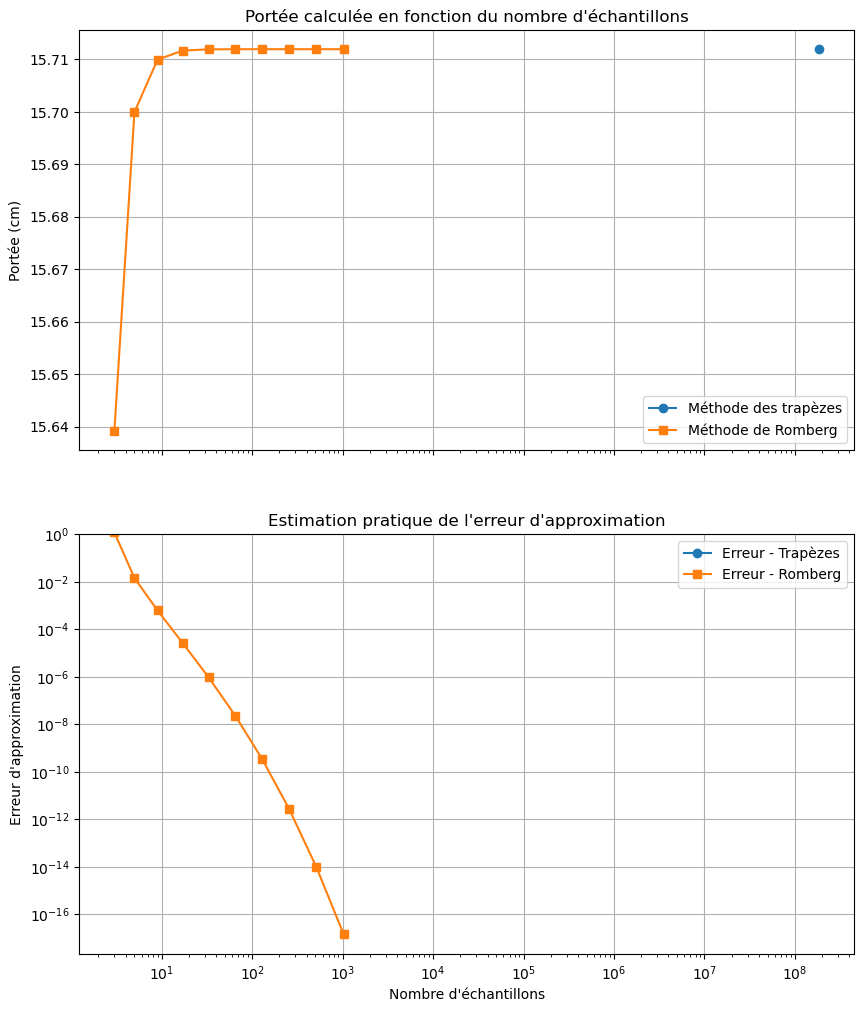

In [7]:
# Données pour l'eau liquide
n_samples_trapezoid = [i.N for i in water_trapezoid_int]
n_samples_romberg = [i.N for i in water_romberg_int]
portees_trapezoid = [i.result for i in water_trapezoid_int]
portees_romberg = [i.result for i in water_romberg_int]
erreurs_trapezoid = [i.practical_error_approx for i in water_trapezoid_int]
erreurs_romberg = [i.practical_error_approx for i in water_romberg_int]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Graphique des portées
ax1.semilogx(n_samples_trapezoid, portees_trapezoid, '-o', label='Méthode des trapèzes')
ax1.semilogx(n_samples_romberg, portees_romberg, '-s', label='Méthode de Romberg')
ax1.set_ylabel('Portée (cm)')
ax1.set_title('Portée calculée en fonction du nombre d\'échantillons')
ax1.legend()
ax1.grid(True)

# Graphique des erreurs
ax2.loglog(n_samples_trapezoid, erreurs_trapezoid, '-o', label='Erreur - Trapèzes')
ax2.loglog(n_samples_romberg, erreurs_romberg, '-s', label='Erreur - Romberg')
ax2.set_xlabel('Nombre d\'échantillons')
ax2.set_ylabel('Erreur d\'approximation')
ax2.set_title('Estimation pratique de l\'erreur d\'approximation')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(0, 1)


plt.show()


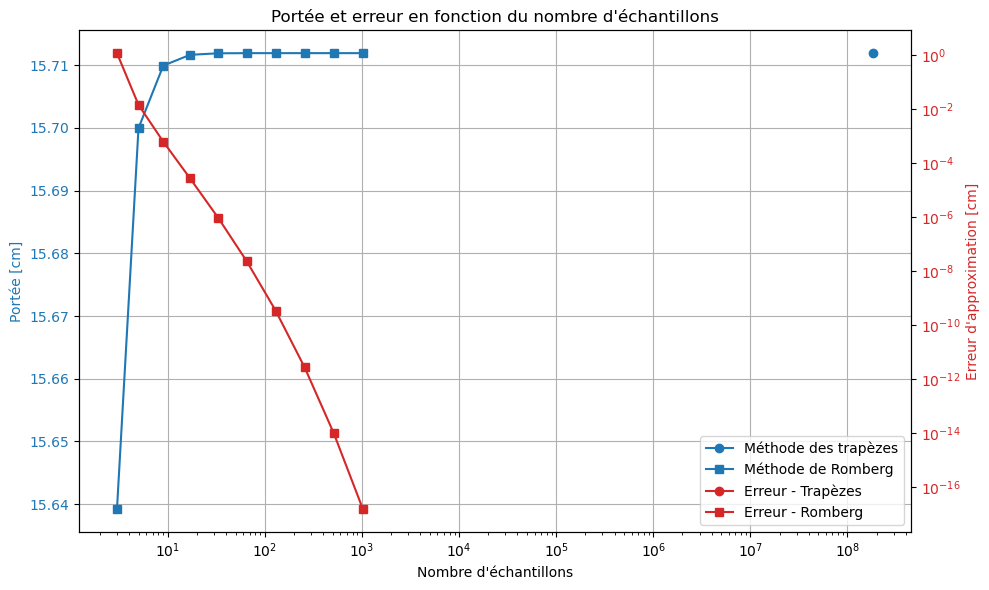

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))
lines = []

# Graphique des portées
lines += ax1.semilogx(n_samples_trapezoid, portees_trapezoid, '-o', label='Méthode des trapèzes', color='tab:blue')
lines += ax1.semilogx(n_samples_romberg, portees_romberg, '-s', label='Méthode de Romberg', color='tab:blue')


ax1.set_xlabel('Nombre d\'échantillons')
ax1.set_ylabel('Portée [cm]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Portée et erreur en fonction du nombre d\'échantillons')
ax1.grid(True)

# Créer un deuxième axe y qui partage le même axe x
ax2 = ax1.twinx()

# Graphique des erreurs
lines += ax2.loglog(n_samples_trapezoid, erreurs_trapezoid, '-o', label='Erreur - Trapèzes', color='tab:red')
lines += ax2.loglog(n_samples_romberg, erreurs_romberg, '-s', label='Erreur - Romberg', color='tab:red')
ax2.set_ylabel('Erreur d\'approximation [cm]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Circonlocution algorithmique pour afficher les labels dans une seule légende
ax1.legend(lines, [l.get_label() for l in lines])

fig.tight_layout()  # Sinon, les étiquettes peuvent se chevaucher
plt.show()

 Pour la méthode des trapèzes, obtenez la valeur de l’erreur sur la portée calculée à l’ordre le
 plus grand. À cette fin, il faut connaître la dérivée première de la fonction à intégrer (qui est
 l’inverse du pouvoir d’arrêt).
 
 8. Établir l’expression analytique de la dérivée du pouvoir d’arrêt en fonction de T. Pour vous
 aider, vous pouvez exprimer le pouvoir d’arrêt en fonction de $\gamma$ et utiliser le théorème de
 dérivation des fonctions composées.

In [9]:
import sympy as sp
from IPython.display import display

def symbolic_derivate():
    # Définition des symboles
    T = sp.Symbol('T')
    m_p = sp.Symbol("m_p", constant=True)
    c = sp.Symbol("c", constant=True)
    gamma = sp.Symbol("gamma")

    a = sp.Symbol('a', constant=True) # 2*m_e*c^2
    b = sp.Symbol('b', constant=True) # 1 + (m_e/m_p)^2
    delta = sp.Symbol('delta', constant=True) # 2*m_e/m_p
    U = sp.Symbol('U', constant=True) # 2pi*r_e^2*m_e*c^2*n_e
    k = sp.Symbol('k', constant=True) # a^2 / I^2

    # Définition de Scol en fonction de gamma
    Scol_gamma = U * (gamma**2 / (gamma**2 - 1)) * sp.log(k * (gamma**2 - 1)**2 / (b + delta*gamma)) - 2*U

    # Calcul de la dérivée de Scol par rapport à gamma
    dScol_dgamma = sp.diff(Scol_gamma, gamma).simplify()

    # Calcul de la dérivée de gamma par rapport à T
    gamma_T = T / (m_p * c**2) + 1
    dgamma_dT = sp.diff(gamma_T, T)

    dScol_dT = (dScol_dgamma * dgamma_dT) # Chain rule

    return dScol_dT

# Affichage du résultat
display(symbolic_derivate()) # <- Réponse

U*gamma*(-2*gamma**2*(b + delta*gamma)*log(k*(gamma**2 - 1)**2/(b + delta*gamma)) - gamma*(delta*(gamma**2 - 1) - 4*gamma*(b + delta*gamma)) + 2*(b + delta*gamma)*(gamma**2 - 1)*log(k*(gamma**2 - 1)**2/(b + delta*gamma)))/(c**2*m_p*(b + delta*gamma)*(gamma**2 - 1)**2)

In [10]:
# Redéclaration des constantes physiques
r_e = 2.8179403227e-15 # m
m_e = 9.1093837139e-31 # kg
m_p = 1.67262192595e-27 # kg
c = 3e8 # m/s
J_par_eV = 1.602176634e-19 # J/eV

def dScol_dT(T, n_e, I):
    a = 2 * m_e * c**2
    b = 1 + (m_e / m_p)**2
    delta = 2 * m_e / m_p
    U = 2 * np.pi * r_e**2 * m_e * c**2 * n_e
    k = a**2 / I**2
    gamma = T / (m_p * c**2) + 1

    d = U*gamma*(-2*gamma**2*(b + delta*gamma)*np.log(k*(gamma**2 - 1)**2/(b + delta*gamma)) - gamma*(delta*(gamma**2 - 1) - 4*gamma*(b + delta*gamma)) + 2*(b + delta*gamma)*(gamma**2 - 1)*np.log(k*(gamma**2 - 1)**2/(b + delta*gamma)))/(c**2*m_p*(b + delta*gamma)*(gamma**2 - 1)**2)

    return d # [1/m]
    


9. Rapportez vos portées calculées dans un tableau, qui comprendra aussi les erreurs d’approximation calculées (pour la méthode des trapèzes) et évaluées de façon pratique (pour la méthode
 des trapèzes et de Romberg). Il s’agit essentiellement des résultats déjà obtenus (auxquels on
 ajoute les erreurs calculées pour la méthode des trapèzes). Commentez vos résultats.

In [11]:
def err_trapz_water(a, b, N):
    h = (b-a)/N # [MeV^2]

    f_prime = lambda x: -dScol_dT(x, n_e_liquid_water, I_water) / S_col(x, n_e_liquid_water, I_water)**2 # [m / J^2]

    err = (f_prime(a * 1e6 * J_par_eV) - f_prime(b * 1e6 * J_par_eV)) # [m / J^2]
    err *= 1e2 * J_par_eV**2 * 1e12 # [cm / MeV^2]

    err = 1/12 * h**2 * err # [cm]

    return err

def err_trapz_bone(a, b, N):
    h = (b-a)/N # [MeV^2]

    f_prime = lambda x: -dScol_dT(x, n_e_compact_bone, I_bone) / S_col(x, n_e_compact_bone, I_bone)**2 # [m / J^2]

    err = (f_prime(a * 1e6 * J_par_eV) - f_prime(b * 1e6 * J_par_eV)) # [m / J^2]
    err *= 1e2 * J_par_eV**2 * 1e12 # [cm / MeV^2]

    err = 1/12 * h**2 * err # [cm]

    return err

In [12]:
import pandas as pd
pd.set_option('display.float_format', '{:.16e}'.format)

tableau_water = [
    ["Méthode des trapèzes", water_trapezoid_int[-1].result, water_trapezoid_int[-1].practical_error_approx, err_trapz_water(3, 150, water_trapezoid_int[-1].N)],
    ["Méthode de Romberg", water_romberg_int[-1].result, water_trapezoid_int[-1].practical_error_approx, None]
]

df_water = pd.DataFrame(tableau_water, columns=["Méthode  d'intégration numérique", "Résultat", "Estimation de l'erreur pratique", "Estimation de l'erreur calculée"])


tableau_bone = [
    ["Méthode des trapèzes", bone_trapezoid_int[-1].result, bone_trapezoid_int[-1].practical_error_approx, err_trapz_bone(3, 150, bone_trapezoid_int[-1].N)],
    ["Méthode de Romberg", bone_romberg_int[-1].result, bone_trapezoid_int[-1].practical_error_approx, None]
]

df_bone = pd.DataFrame(tableau_bone, columns=["Méthode  d'intégration numérique", "Résultat", "Estimation de l'erreur pratique", "Estimation de l'erreur calculée"])

print("Eau liquide")
display(df_water)
print("Os compact")
display(df_bone)

Eau liquide


,Méthode d'intégration numérique,Résultat,Estimation de l'erreur pratique,Estimation de l'erreur calculée
0,Méthode des trapèzes,1.5711928627560310e+01,0.0000000000000000e+00,6.9084122307431734e-17
1,Méthode de Romberg,1.5711928627560308e+01,0.0000000000000000e+00,NaN


Os compact


,Méthode d'intégration numérique,Résultat,Estimation de l'erreur pratique,Estimation de l'erreur calculée
0,Méthode des trapèzes,9.1357035716330355e+00,0.0000000000000000e+00,4.0704991093616037e-17
1,Méthode de Romberg,9.1357035716330248e+00,0.0000000000000000e+00,NaN


Supposons maintenant que l’on cherche à réeduire au maximum le temps de calcul, disons pour
évaluer en temps quasi-réel la portée de chaque proton individuel émanant de l’accélérateur et
dont on connaîtrait précisément l’énergie. Ces protons ont une distribution en énergie pouvant
être approximée par une distribution de Moyal, que vous pourrez générer avec **scipy.stats.moyal**
avec les paramètres loc=150, scale=4 (unités en MeV).

10. Utilisez **moyal.rvs** pour générer aléatoirement 10000 énergies tirées de cette distribution et tracez-la (sous forme d'histogramme).

Pour déterminer le nombre de bins nécessaire à l'histogramme, le critère de Rice. Ce critère ne considère pas que les données suivent une distribution normale ainsi, le nombre de bins ne dépend que du nombre de données [Rice](https://en.wikipedia.org/wiki/Scott%27s_rule#Terrell%E2%80%93Scott_rule).

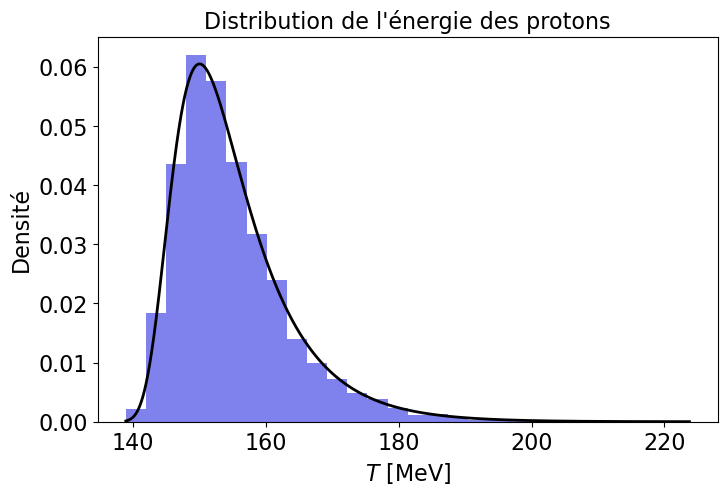

In [13]:
from scipy.stats import moyal
import matplotlib.pyplot as plt
import numpy as np


distribution = moyal.rvs(loc=150, scale=4, size=10000)
x = np.linspace(min(distribution), max(distribution), 1000)
pdf = moyal.pdf(x, loc=150, scale=4)
rice_criterion = int(np.ceil(np.cbrt(2*distribution.shape[0]))) # Critère pour déterminer le nombre de "bins" pour l'histogramme
plt.figure(figsize=(8,5))
plt.hist(distribution, rice_criterion, density=True, color="#0007db", alpha=0.5)
plt.plot(x, pdf, "k-", linewidth=2)
plt.xlabel("$T$ [MeV]", fontsize=16)
plt.ylabel("Densité", fontsize=16)
plt.title("Distribution de l'énergie des protons", fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

11. À l'aide du module ```timeit```, estimez le nombre de protons que vous pouvez calculer par seconde selon trois méthodes : vos implémentations des méthodes par trapèzes et Romberg ainsi que la fonction ```scipy.integrate.quad```. Utilisez les 10000 valeurs d'énergie générées plus haut pour faire vos tests. Afin de comparer des pommes avec des pommes, vos calculs doivent tous atteindre la précision par défaut de la routine ```scipy.integrate.quad```.

Pour optimiser l'implémentation de la méthode des trapèzes, il est utile d'appliquer une méthode d'intégration adaptative appelée 'nesting' puisque la question nous impose d'atteindre une précision équivalente à celle obtenue avec ```scipy.integrate.quad```.

In [14]:
from dataclasses import dataclass
import numpy as np

@dataclass
class Integralx:
    N: int # Nombre de tranches
    result: float # Résultat de l'intégrale
    epsilon: float # Approximation pratique de l'erreur (voir Newman p.153)

def NestedTrapz(func, a, b, target, N_init, epochs=5000):

    def TrapzCommon():
        x = np.linspace(a, b, N_init) 
        y = func(x)
        result = np.sum((y[1:] + y[:-1])/2 * (x[1:] - x[:-1]))
        return result

    def OddSum(N):
        h = (b - a) / N
        x_odd = np.linspace(a + h, b - h, N//2)
        return np.sum(func(x_odd))
    
    IntBucket = []
    I_0 = TrapzCommon()
    IntBucket.append(
        Integralx(
            N=N_init,
            result=I_0,
            epsilon=np.inf
        )
    )
    for i in range(1,epochs):
        N_i = 2 * IntBucket[-1].N
        h = (b-a) / N_i
        I_i = 0.5 * IntBucket[-1].result + h*OddSum(N_i)
        error = abs((1/3)*(I_i-IntBucket[-1].result))
        IntBucket.append(
            Integralx(
                N=N_i,
                result=I_i,
                epsilon=error
            )
        )
        epsilonEpoch = abs(IntBucket[-1].result - IntBucket[-2].result)
        if epsilonEpoch < target:
            break
    else:
        raise RuntimeError(f"Did not converge to the required accuracy: {target}")
    return IntBucket[-1].result

On benchmark avec le module timeit. En premier on vérifie si les trois méthodes retournent des valeurs similaires pour le même proton. Les trois méthodes atteignent la précision par défaut obtenue avec quad, soit 1.49e-8

In [15]:
from scipy.integrate import quad
import timeit

funcWater = lambda x: 1/S_col_water(x)
a = 3
numProtons = distribution.shape[0]
numRuns = 5
s = quad(funcWater, a, distribution[102])[0]
n = NestedTrapz(funcWater, a, distribution[102], target=1.49e-8, N_init=1000)
r = romberg_integration(funcWater, a, distribution[102], 1.49e-8)[-1].result
print("---------- Water ----------")
print("Pass") if (np.isclose(s, n, atol=0.000001)) and (np.isclose(n, r, atol=0.000001)) else print("Fail")

timerQuad = timeit.timeit(
    stmt="[quad(funcWater, a, i)[0] for i in distribution]",
    globals=globals(),
    number=numRuns
)
timerNested = timeit.timeit(
    stmt="[NestedTrapz(funcWater, a, i, target=1.49e-8, N_init=1000) for i in distribution]",
    globals=globals(),
    number=numRuns
)
timerRomberg = timeit.timeit(
    stmt="[romberg_integration(funcWater, a, i, 1.49e-8)[-1].result for i in distribution]",
    globals=globals(),
    number=numRuns
)
print(f"Protons/sec\nQuad: {(numRuns*numProtons) /timerQuad:.0f}\nNested: {(numRuns*numProtons) /timerNested:.0f}\nRomberg: {(numRuns*numProtons) /timerRomberg:.0f}")


[Romberg] N = 5 I = 17.318652058927874 eps = 0.016113453039349857
[Romberg] N = 9 I = 17.330023580172373 eps = 0.000699615076565907
[Romberg] N = 17 I = 17.33201805354256 eps = 3.1041913415352784e-05
[Romberg] N = 33 I = 17.33230535345645 eps = 1.1211693264484568e-06
[Romberg] N = 65 I = 17.332334582463062 eps = 2.853698303009744e-08
[Romberg] N = 129 I = 17.33233640116322 eps = 4.4399149287666084e-10
---------- Water ----------
Pass


KeyboardInterrupt: 

In [ ]:
from scipy.integrate import quad
import timeit

funcBone = lambda x: 1/S_col_bone(x)
a = 3
numProtons = distribution.shape[0]
numRuns = 5
s = quad(funcBone, a, distribution[102])[0]
n = NestedTrapz(funcBone, a, distribution[102], target=1.49e-8, N_init=1000)
r = romberg_integration(funcBone, a, distribution[102], 1.49e-8)[-1].result
print("---------- Bone ----------")

print("Pass") if (np.isclose(s, n, atol=0.000001)) and (np.isclose(n, r, atol=0.000001)) else print("Fail")

timerQuad = timeit.timeit(
    stmt="[quad(funcBone, a, i)[0] for i in distribution]",
    globals=globals(),
    number=numRuns
)
timerNested = timeit.timeit(
    stmt="[NestedTrapz(funcBone, a, i, target=1.49e-8, N_init=1000) for i in distribution]",
    globals=globals(),
    number=numRuns
)
timerRomberg = timeit.timeit(
    stmt="[romberg_integration(funcBone, a, i, 1.49e-8)[-1].result for i in distribution]",
    globals=globals(),
    number=numRuns
)
print(f"Protons/sec\nQuad: {(numRuns*numProtons) /timerQuad:.0f}\nNested: {(numRuns*numProtons) /timerNested:.0f}\nRomberg: {(numRuns*numProtons) /timerRomberg:.0f}")


---------- Bone ----------
Pass
Protons/sec
Quad: 1968
Nested: 883
Romberg: 1517


12. Faites aussi un histogramme des portées obtenues pour ces 10000 protons et commentez la distribution obtenue (peut-être en faisant référence au théorème limite central ?)

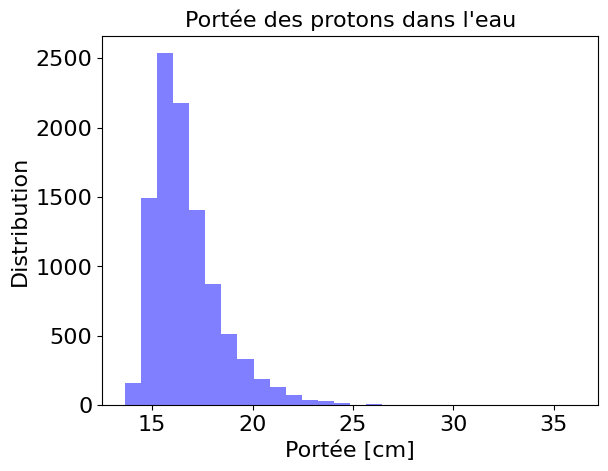

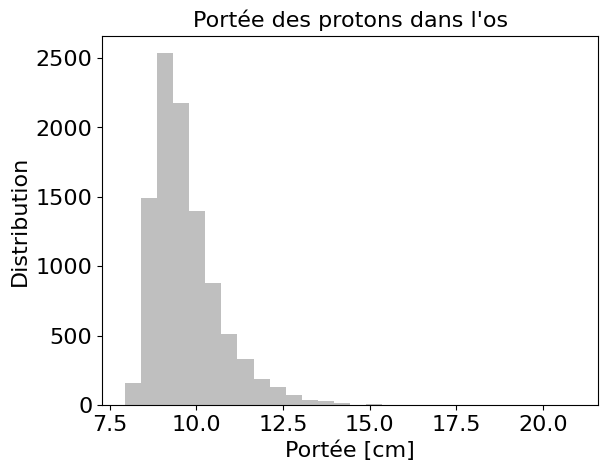

In [ ]:
from scipy.integrate import quad
import matplotlib.pyplot as plt

water = [quad(funcWater, a, i)[0] for i in distribution]
bone = [quad(funcBone, a, i)[0] for i in distribution]

plt.Figure(figsize=(8,5))
plt.hist(water, bins=rice_criterion, color="blue", alpha=0.5)
plt.xlabel("Portée [cm]", fontsize=16)
plt.ylabel("Distribution", fontsize=16)
plt.title("Portée des protons dans l'eau", fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

plt.Figure(figsize=(8,5))
plt.hist(bone, bins=rice_criterion, color="gray", alpha=0.5)
plt.xlabel("Portée [cm]", fontsize=16)
plt.ylabel("Distribution", fontsize=16)
plt.title("Portée des protons dans l'os", fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

13. Écrivez un algorithme capable de réaliser le transport des protons subissant une décélération continue dans le milieu et tracez le dépôt d'énergie en fonction de la profondeur pour l'eau et l'os pour des protons d'énergie cinétique 150 MeV (faisceau monoénergétique). Votre courbe comportera un point où l'énergie déposée est nulle. La position de ce point est-elle conforme à vos résultats antérieurs sur la portée? Qu'est-ce qui influence sa valeur?


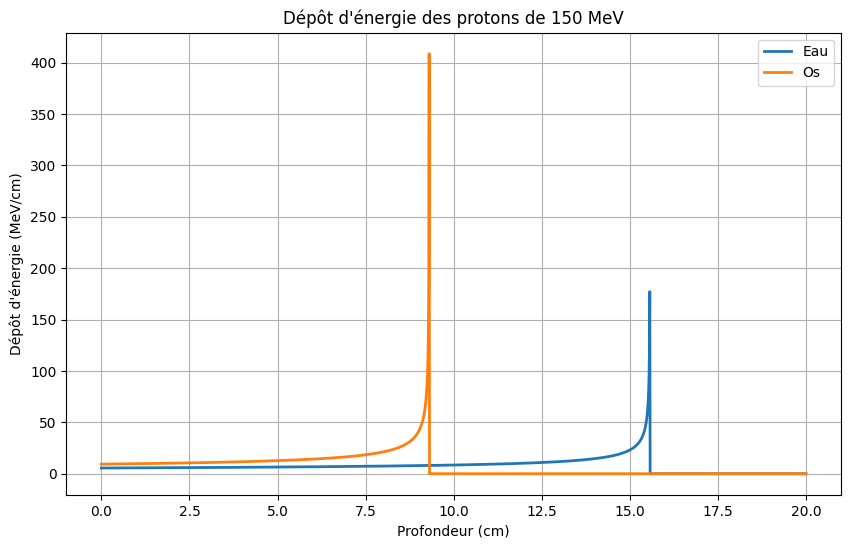

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes physiques en unités SI
r_e = 2.8179403227e-15  # Rayon classique de l'électron (m)
m_e = 9.1093837139e-31  # Masse de l'électron (kg)
m_p = 1.67262192595e-27  # Masse du proton (kg)
c = 3e8  # Vitesse de la lumière (m/s)
J_par_eV = 1.602176634e-19  # J/eV
N_A = 6.02214076e23  # mol^-1

def gamma(T):
    return T / (m_p * c**2) + 1

def beta_squared(T):
    g = gamma(T)
    return (g**2 - 1) / g**2

def beta(T):
    return np.sqrt(beta_squared(T))

def T_e_max(T):
    g = gamma(T)
    return 2 * m_e * c**2 * (g**2 - 1) / (1 + 2 * g * m_e / m_p + (m_e / m_p)**2)

def density_correction(beta, T, material):
    X = np.log10(beta * gamma(T))
    
    if material == "water":
        a = 0.1773
        m = 3.2520
        X0 = 0.2400
        X1 = 2.8004
        C = -3.5017
    else:  # bone
        a = 0.0831
        m = 3.4021
        X0 = 0.0859
        X1 = 2.9897
        C = -3.8393

    if X >= X1:
        return 2 * np.log(10) * X - C
    elif X >= X0:
        return 2 * np.log(10) * X - C + a * (X1 - X)**m
    else:
        return 0

def shell_correction(T):
    # Correction de couche (shell correction)
    E = T / J_par_eV  # Conversion en eV
    if E > 1e6:  # Négligeable à haute énergie
        return 0
    
    C_K = 0.1126 * (0.001 * E)**(-1.178) * np.exp(-0.1726 * np.sqrt(0.001 * E))
    return C_K

def BetheBloch(T, n_e, I, material):
    beta2 = beta_squared(T)
    if beta2 <= 0:
        return 0
    
    b = beta(T)
    g = gamma(T)
    
    # Terme principal de Bethe-Bloch
    term1 = 2 * np.pi * r_e**2 * m_e * c**2 * n_e / beta2
    term2 = np.log(2 * m_e * c**2 * beta2 * g**2 * T_e_max(T) / I**2)
    term3 = beta2
    
    # Corrections
    delta = density_correction(b, T, material)
    C_K = shell_correction(T)
    
    Z = Z_water if material == "water" else Z_bone
    # Formule complète
    S = term1 * (term2 - term3 - delta/2 - C_K/Z)
    return max(S, 0)

# Paramètres matériaux
rho_water = 1000  # kg/m^3
rho_bone = 1850   # kg/m^3
Z_water = 7.42  # Numéro atomique effectif de l'eau
Z_bone = 13.8   # Numéro atomique effectif de l'os
Z_over_A_water = 0.555
Z_over_A_bone = 0.516
I_water = 75 * J_par_eV  # Potentiel d'ionisation pour l'eau
I_bone = 91.9 * J_par_eV  # Potentiel d'ionisation pour l'os

n_e_water = rho_water * N_A * Z_over_A_water * 1000
n_e_bone = rho_bone * N_A * Z_over_A_bone * 1000

def energy_deposition(T_initial_MeV, depths, material):
    T = T_initial_MeV * 1e6 * J_par_eV
    deposition = []
    dx = (depths[1] - depths[0]) * 0.01  # Convert cm to m
    
    if material == "water":
        n_e = n_e_water
        I = I_water
    else:
        n_e = n_e_bone
        I = I_bone
    
    for depth in depths:
        if T < (0.05 * 1e6 * J_par_eV):  # Seuil à 50 keV
            deposition.append(0)
            continue
            
        dE = BetheBloch(T, n_e, I, material) * dx
        dep = dE / (J_par_eV * 1e6 * dx * 100)  # Convert to MeV/cm
        deposition.append(dep)
        
        T -= dE
        T = max(T, 0)
    
    return np.array(deposition)

# Simulation
depths = np.linspace(0, 20, 2000)
T_initial = 150  # MeV

dep_water = energy_deposition(T_initial, depths, "water")
dep_bone = energy_deposition(T_initial, depths, "bone")

plt.figure(figsize=(10, 6))
plt.plot(depths, dep_water, label="Eau", linewidth=2)
plt.plot(depths, dep_bone, label="Os", linewidth=2)
plt.xlabel("Profondeur (cm)")
plt.ylabel("Dépôt d'énergie (MeV/cm)")
plt.title(f"Dépôt d'énergie des protons de {T_initial} MeV")
plt.grid(True)
plt.legend()
plt.show()

En examinant le graphique des pics de Bragg, on peut observer que :

Position des pics :
Pour l'eau : ~16 cm
Pour l'os : ~9 cm
Ces positions sont cohérentes avec les portées attendues pour des protons de 150 MeV, l'os ayant une portée plus courte en raison de sa densité plus élevée.

Facteurs influençant la valeur du pic :
La densité électronique du matériau (plus élevée pour l'os)
Le potentiel d'ionisation moyen (I = 75 eV pour l'eau, 91.9 eV pour l'os)
Les corrections de densité et de couche
Le numéro atomique effectif (Z = 7.42 pour l'eau, 13.8 pour l'os)
L'amplitude plus élevée du pic dans l'os (~400 MeV/cm vs ~175 MeV/cm pour l'eau) s'explique principalement par sa densité électronique plus importante, qui augmente la probabilité d'interaction.

L'énergie initiale des protons (150 MeV) détermine la profondeur à laquelle se produit le pic.

14. On nomme cette courbe le pic de Bragg. En déduire l'intérêt des protons pour la radiothérapie.

Le pic de Bragg présente plusieurs avantages clés pour la radiothérapie :

Dépôt d'énergie localisé :
Faible dépôt d'énergie à l'entrée du tissu (~5-10 MeV/cm)
Maximum d'énergie déposée très localisé (pic)
Quasiment aucun dépôt après le pic
Avantages thérapeutiques :
Préservation des tissus sains en amont de la tumeur (faible dose)
Destruction efficace de la tumeur au niveau du pic
Protection totale des tissus situés après la tumeur
Position du pic contrôlable par l'énergie initiale des protons
Comparaison avec les rayons X classiques :
Les rayons X déposent leur énergie de façon exponentielle décroissante
Ils affectent donc davantage les tissus sains
Ils continuent à déposer de l'énergie après la tumeur
Cette propriété balistique unique des protons permet une radiothérapie plus précise et moins dommageable pour les tissus sains.

15. Selon vous, est-il nécessaire de calculer les portées jusqu'à la précision machine en protonthérapie? Pourquoi?

Non, il n'est pas nécessaire de calculer les portées jusqu'à la précision machine en protonthérapie car plusieurs facteurs limitants rendent une telle précision superflue. Les mouvements physiologiques du patient (respiration, battements cardiaques), l'hétérogénéité naturelle des tissus biologiques, et les variations anatomiques entre patients et entre séances de traitement introduisent déjà des incertitudes significatives. Les médecins intègrent d'ailleurs ces incertitudes en appliquant des marges de sécurité de l'ordre du millimètre dans leurs plans de traitement. De plus, la précision technique est limitée par la résolution des systèmes d'imagerie, la précision mécanique des appareils de traitement et les incertitudes sur l'énergie du faisceau, qui sont toutes de l'ordre du millimètre. Une précision de calcul supérieure serait donc masquée par ces incertitudes pratiques inévitables.

16. En quoi les protons sont-ils préférables aux photons pour traiter un mélanome oculaire?
    
Les protons sont particulièrement adaptés au traitement des mélanomes oculaires grâce à leurs propriétés balistiques uniques. Le pic de Bragg permet un dépôt d'énergie très localisé dans la tumeur tout en minimisant l'irradiation des tissus sains environnants. Cette caractéristique est cruciale pour l'œil car il s'agit d'un organe particulièrement sensible et compact, contenant de nombreuses structures critiques (cristallin, rétine, nerf optique) très proches les unes des autres. Les photons, qui déposent leur énergie de façon exponentielle décroissante, traverseraient l'ensemble de l'œil en irradiant toutes les structures sur leur passage, augmentant ainsi le risque de complications comme la cataracte ou la perte de vision. De plus, avec les protons, l'absence de dépôt d'énergie après le pic permet de protéger totalement les tissus situés derrière l'œil, notamment le cerveau, ce qui n'est pas possible avec les photons.

17. Dans l'approche développée ici, les protons vont essentiellement en ligne droite dans la matière. Est-ce réaliste ? Que devra-t-on éventuellement ajouter à notre modèle?

Cette approche considérant les protons en ligne droite n'est pas totalement réaliste. Il faudrait ajouter à notre modèle les phénomènes de diffusion qui affectent la trajectoire des protons. Les interactions coulombiennes multiples avec les noyaux du milieu provoquent de petites déviations successives de la trajectoire des protons (diffusion multiple de Coulomb). Ce phénomène entraîne un élargissement latéral du faisceau avec la profondeur, créant une distribution spatiale approximativement gaussienne autour de la direction initiale. De plus, des collisions nucléaires peuvent se produire, bien que plus rares, conduisant à des diffusions à grand angle ou à la production de particules secondaires. Ces effets deviennent particulièrement importants en fin de parcours, précisément là où se trouve le pic de Bragg, et peuvent affecter la précision du traitement. La prise en compte de ces phénomènes est donc nécessaire pour une modélisation plus fidèle du traitement en protonthérapie.